# Machine Learning From Disaster - Titanic

## Business Understanding

In [ ]:
RMS Titanic was a British passenger liner operated by the White Star Line,
that sank in the North Atlantic Ocean in the early morning hours of April 15, 1912.
The Titanic struck an iceberg during her maiden voyage from Southampton to New York City. 
Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, 
making the sinking one of modern history's deadliest peacetime commercial marine disasters. 

RMS Titanic was the largest ship afloat at the time she entered service and was the second 
of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland
and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, 
died in the disaster.

Titanic was under the command of Capt. Edward Smith, who also went down with the ship.
The ocean liner carried some of the wealthiest people in the world, 
as well as hundreds of emigrants from Great Britain and Ireland,
Scandinavia and elsewhere throughout Europe, who were seeking a new life in the United States.

The first-class accommodation was designed to be the pinnacle of comfort and luxury, with a gymnasium,
swimming pool, libraries, high-class restaurants and opulent cabins.
A high-powered radiotelegraph transmitter was available for sending passenger "marconigrams" 
and for the ship's operational use.
Although Titanic had advanced safety features, such as watertight compartments and remotely activated 
watertight doors, it only carried enough lifeboats for 1,178 people—about half the number on board, 
and one third of her total capacity—due to outdated maritime safety regulations. 

After leaving Southampton on 10 April 1912, Titanic called at Cherbourg in France and Queenstown 
(now Cobh) in Ireland, before heading west to New York.

On 14 April, four days into the crossing and about 375 miles (600 km) south of Newfoundland, 
she hit an iceberg at 11:40 p.m. ship's time. 
The collision caused the hull plates to buckle inwards along her starboard (right) side and opened 
five of her sixteen watertight compartments to the sea; she could only survive four flooding. 

Meanwhile, passengers and some crew members were evacuated in lifeboats, many of which were launched only
partially loaded.
A disproportionate number of men were left aboard because of a "women and children first" protocol for 
loading lifeboats. At 2:20 a.m., she broke apart and foundered with well over one thousand people still aboard.

### Specifying the Data Analytic Question

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### Defining the Metric for Success

In [ ]:
1)We Identify the most importaint features for predicting the chances of survival.

2)The model achieves atleast 80% accuracy.

3)The Confusion Matrix has the lowest possible false positives and false neagtives.

### Data Understanding

In [ ]:
VARIABLE DESCRIPTIONS

Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


### Recording the Experimental Design


In [ ]:
The project was undertaken using the following design Datasets(titanic.csv)

Exploratory Data Analysis

Data Cleaning

External Data Source Validation

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

Modelling: KNN(K- Nearest Neighbor), Naive Bayes

Challenging the solution: Modelling using the first 5 principal Components
    
Follow up Questions

Conclusion

### Data Relevance

In [ ]:
How accurate is the data at predicting whether a passenger survived or not?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

## Data Cleaning

### Importing the libraries

In [183]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading the Data

In [184]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = train.csv
# ---
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')



### Checking the Data

In [11]:
#previewing the train dataset
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#previewing the test dataset
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
The train dataset has the dependent variable we want to predict (survived) plus other 
independent variables such as Name, sex and age. 
We will use this the train data to train our model.
The test dataset has the same independent variables as the train data but does not contain the 
dependent variable (survived).
The test data helps us evaluate how well our model performs on unseen data.

In [185]:
# Determining the no. of records in our dataset
#creating  copy and renaming the dataframe
df_train.shape

#891 row entries and 12 columns

(891, 12)

In [186]:
#obtaining more information about our data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Data Description

In [ ]:
#describing the features
# Categorical features
Nominal: Cabin, Embarked #more than one category, but not ordered
Dichotomous: sex         #has only two possible outcomes
Ordinal: Pclass          #more than one category, but has an intrinsic order

#Numerical Features
Discrete: Passenger ID,SibSp,Parch,Survived 
Continuous: Age, Fare        

In [187]:
# Previewing the bottom of our dataset
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Tidying the Dataset

In [188]:
#identifting the null values
df_train.isnull().sum().sum()
#there are 866 null values

866

In [189]:
# Checking for null values per column
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [190]:
df_train.PassengerId.nunique()

891

In [191]:
df_train.Ticket.nunique()

681

In [ ]:
The ['PassengerId','Ticket'] columns will not be useful for analysis since they have
very high dimensionality (too many unique values)thus, we drop them.

In [192]:
#creating a copy
df_train1 = df_train.drop( ['PassengerId','Ticket'] , axis = 1)
df_train1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


#### Age Column: Replacing the missing values with the mean.

In [193]:
# Dealing with the Missing Data
#The age column has 177 missing values.
#Replacing the missing values with the mean. 
#creating a copy
df_train2 = df_train1
df_train2['Age']= df_train2['Age'].fillna(df_train2['Age'].mean(), axis = 0)

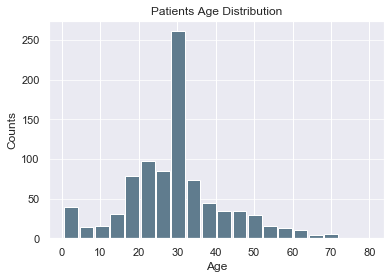

In [194]:
#visualizing age dirstibution
size, scale = 1000, 10
age = df_train2['Age']

age.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [26]:
#using the mean to replace missing values in the Age column results in a normally distributed
#LEPTOKURTIC curve.

#### Cabin Column

In [195]:
#The cabin column has 687 (79%) missing values.
#we will use the fare column to impute the missing values
#creating a copy
df_train3 = df_train2
df_train3.Cabin.isnull().sum()
df_train3.Cabin.nunique()

147

In [196]:
df_train3.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
B102                 0.0000
B94                  0.0000
A36                  0.0000
F G63                7.6500
F G73                7.6500
                     ...   
B58 B60            247.5208
B51 B53 B55        258.6646
B57 B59 B63 B66    262.3750
C23 C25 C27        263.0000
B101               512.3292
Name: Fare, Length: 147, dtype: float64

In [197]:
#There are too many unigue values but we can group the cabins using the first letter of the cabin
#creating a copy
df_train4 = df_train3

## Assigning the null values to Z
df_train4.Cabin.fillna("Z", inplace=True)

df_train4.Cabin = [i[0] for i in df_train4.Cabin]

In [198]:
#using the first letter gives the major Cabin partitions.
#we then obtain the average fares based on each partition. 
#Partition G has the lowest mean value meaning that was the cheapest Cabin partition and
#Partition B has the highest mean value meaning that was the most expensive Cabin partition.
df_train4.groupby("Cabin")['Fare'].mean().sort_values()


Cabin
G     13.581250
F     18.696792
Z     19.157325
T     35.500000
A     39.623887
E     46.026694
D     57.244576
C    100.151341
B    113.505764
Name: Fare, dtype: float64

In [199]:
#we therefore create a function to impute the cabin values using the fare column(Pounds)
def cabin_fxn(i):
    
    #initializing as 0
    a = 0
    if i<14:
        a = "G"
    elif i>=14 and i<19:
        a = "F"
    elif i>=19 and i<20:
        a = "N"
    elif i>=20 and i<35:
        a = "T"
    elif i>= 35 and i<40:
        a = "A"
    elif i>= 40 and i<46:
        a = "E"
    elif i>=47 and i<57:
        a = 'D'
    elif i>=58 and i<100:
        a = 'C'
    else:
        a = "B"
    return a
    

In [200]:
df_train4.Cabin.isnull().sum()

0

#### Embarked Column

In [201]:
#The embarked column has two missing values
#viewing the 2 missing values.
#we then look at other independent variables that may help us determine the correct value for the Embarked
#column
df_train4[df_train4.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B,NaN


In [34]:
#similarities between the two rows with null values on the embarked column.
# survived
# P class 1
# Female

Text(0.5, 1.0, 'Test Set')

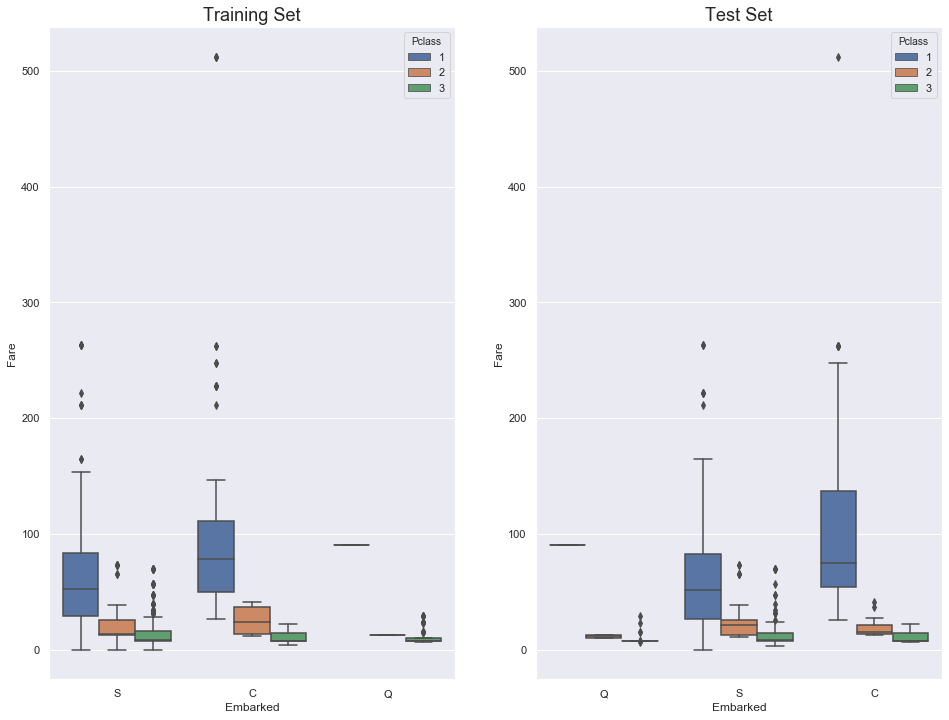

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df_train4, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df_test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)

In [36]:
#On both the train and test dataset, most of the passengers who paid an average fare of 80$ had 
#type 'C' on the embarked column thus we replace the null vales with C.

In [203]:
## Replacing the null values in the Embarked column with C. 
#creating a copy
df_train5 = df_train4
df_train5.Embarked.fillna("C", inplace=True)


In [204]:
df_train5.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Cabin         9
Embarked      3
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis


#### Numerical Columns

##### Age Column

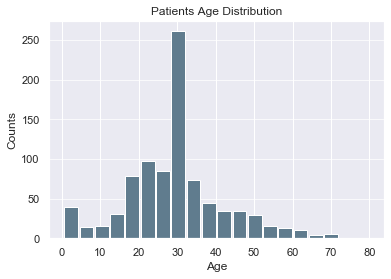

In [205]:
#visualizing age dirstibution
size, scale = 1000, 10
age = df_train5['Age']

age.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [40]:
#The distribution is leptokurtic.
#The Kurtosis is greater than normal which is the effect of replacing the missing values with the mean age

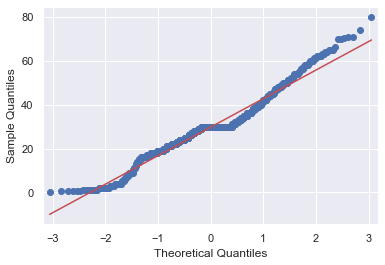

In [206]:
#Normality test 
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# generate univariate observations
data = df_train5['Age']

# q-q plot
qqplot(data, line='s')
pyplot.show()

In [42]:
#The age follows a normal distribution

Text(0.5, 1.0, 'Boxplot of Age')

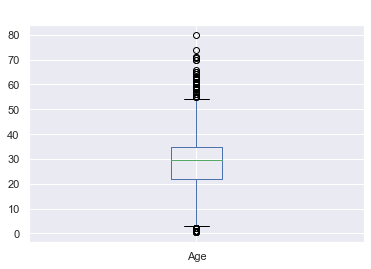

In [207]:
#checking for outliers using a boxplot
df_train5.boxplot(column=['Age'])
plt.title("Boxplot of Age",fontsize=16,color="white")

##### Fare Column

In [208]:
df_train5.Cabin.value_counts()

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

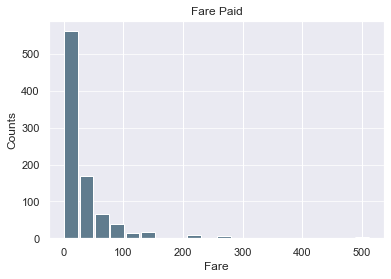

In [210]:
#visualizing fare dirstibution
size, scale = 1000, 10
age = df_train5['Fare']

age.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Fare Paid')
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [46]:
#Distribution of the fares paid is right skewed. The highest count is Category 'N' 
#which attributes for 77%. 
#This means that 77% of the passengers paid a mean of 19 'units of currency' (Pounds)for the trip.

#### Categorical COlumns

##### Cabin Column

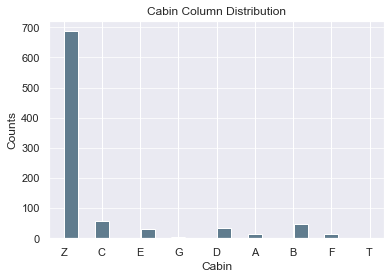

In [218]:
#visualizing Cabin dirstibution
size, scale = 1000, 10
age = df_train5['Cabin']

age.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Cabin Column Distribution')
plt.xlabel('Cabin')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

##### Other Columns

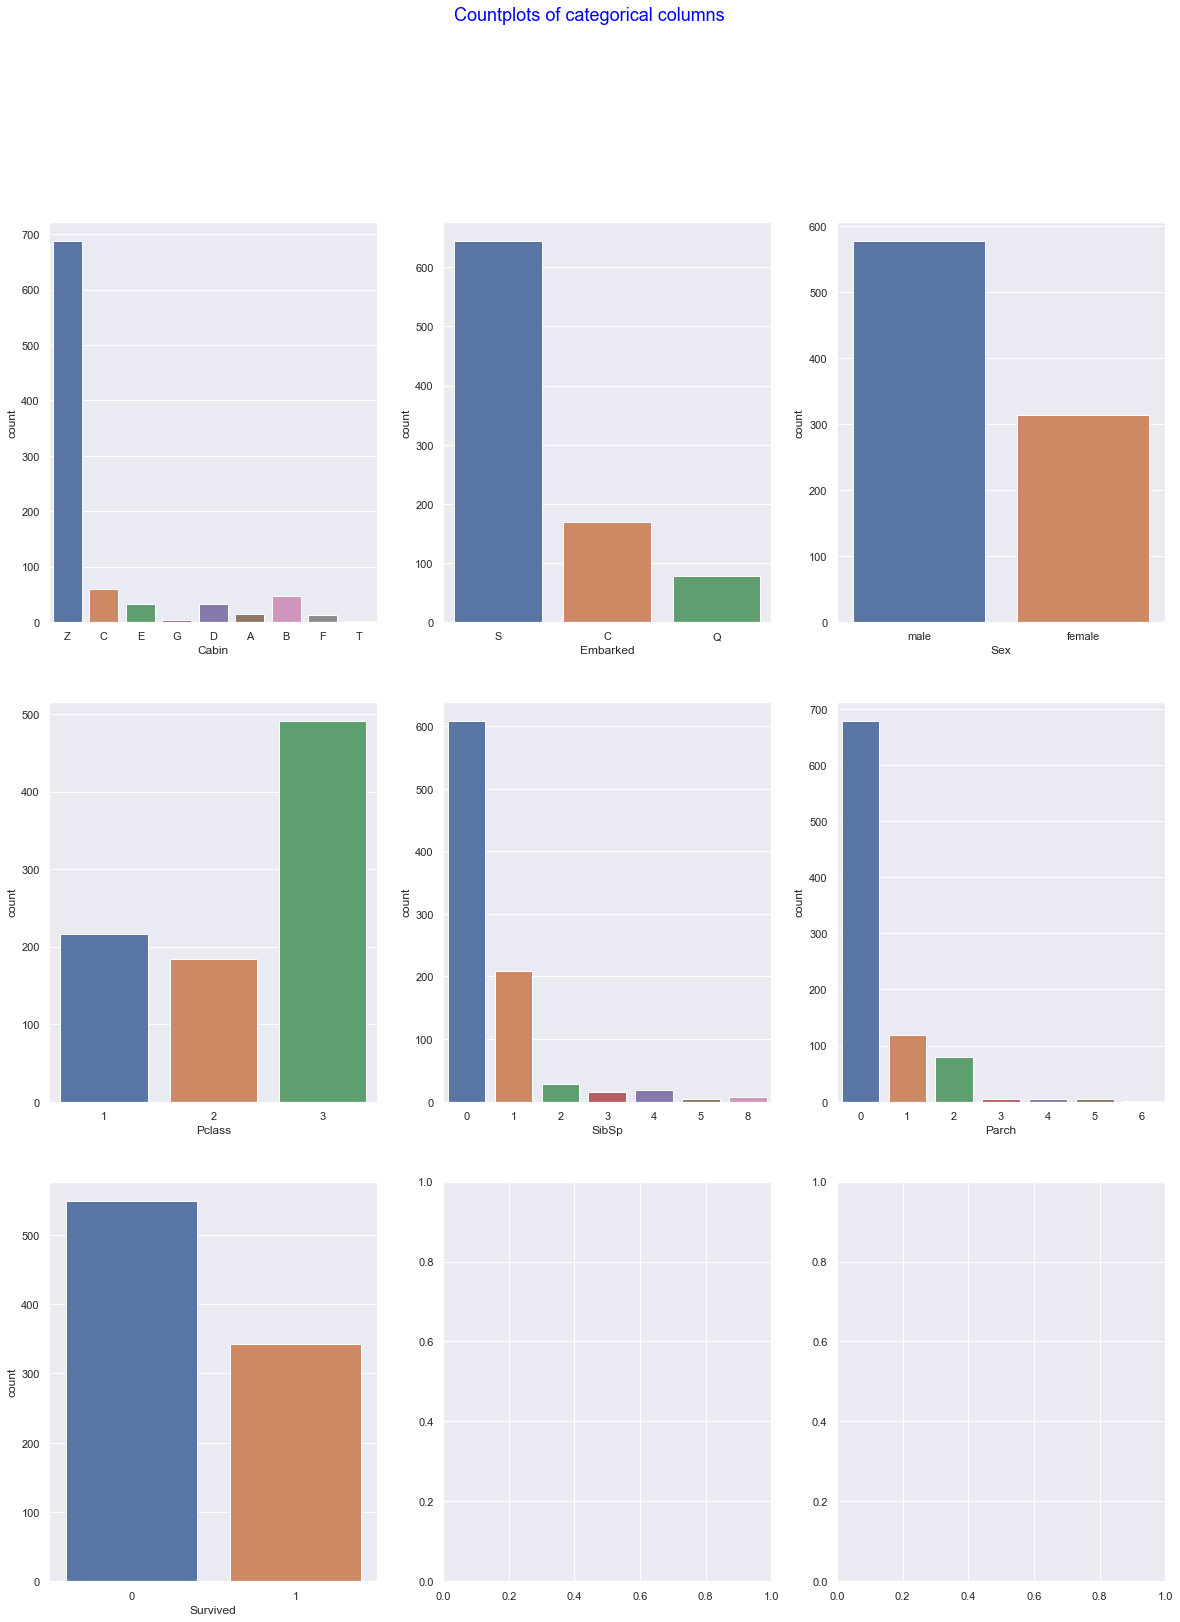

In [217]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_columns_1 =['Cabin', 'Embarked','Sex', 'Pclass','SibSp','Parch','Survived' ]


sb.set(style = 'darkgrid', context = 'notebook')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), df_train5, categorical_columns_1):
   sb.countplot(df_train5[column], ax=ax)

In [ ]:
#There were more males on the ship than females
#Persons who died in the tragedy were more than those who survived
#Most people on the ship did not have family members onboard
#The third class had most people on the ship
#Cabin Z had the most occupants

### Bi-variate Analysis

#### Gender vs Survived

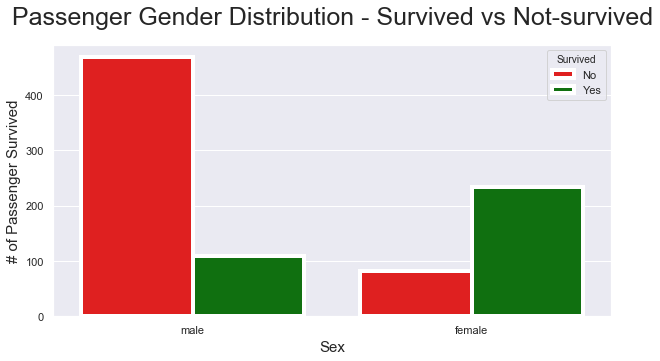

In [219]:

pal = {1:"green", 0:"red"}
sns.set(style="darkgrid")
plt.subplots(figsize = (10,5))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = df_train5, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=20)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

In [ ]:
More men died in the tragedy as compared to women.This is because a disproportionate number of men
were left aboard because of a "women and children first" protocol for loading lifeboats.

#### Passenger Class vs Survived

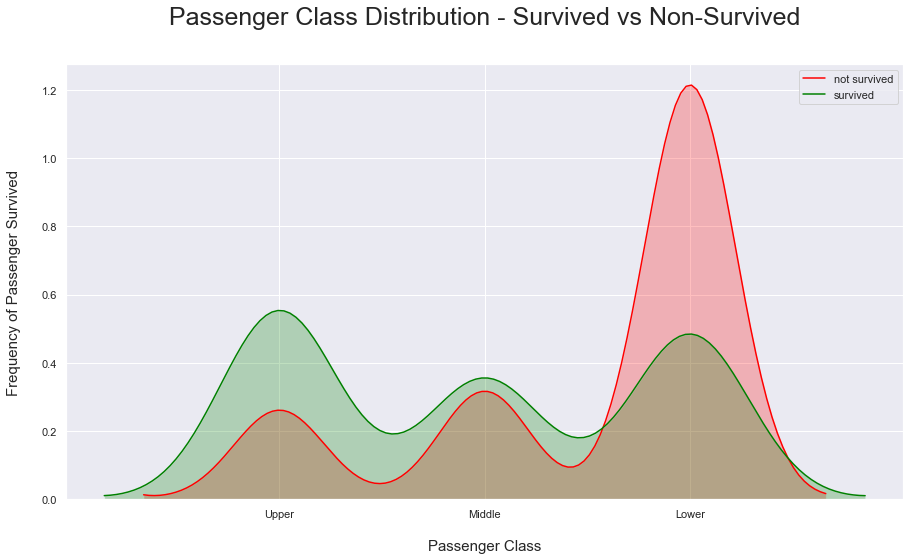

In [220]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(df_train5.Pclass[df_train5.Survived == 0] , 
               color='red',
               shade=True,
               label='not survived')
ax=sns.kdeplot(df_train5.loc[(df_train5['Survived'] == 1),'Pclass'] , 
               color='green',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(df_train5.Pclass.unique()), labels);

In [ ]:
In the upper class, those who survived were about twice more than those who died.
in the middle class, survivors were slightly more than those who died.
in the lower class, those who died were about thrice as much as those who survived.

#### Age Vs Survived

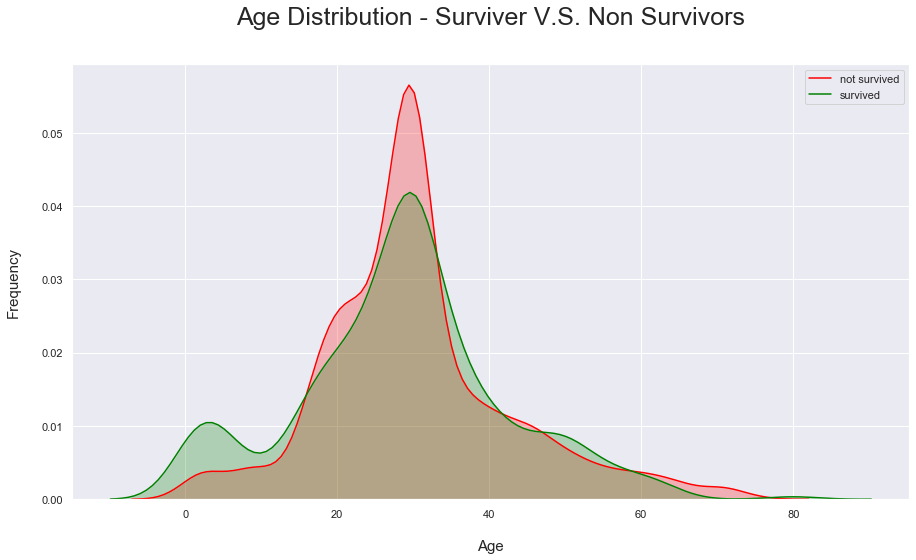

In [221]:
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df_train5.loc[(df_train5['Survived'] == 0),'Age'] , color='red',shade=True,label='not survived')
ax=sns.kdeplot(df_train5.loc[(df_train5['Survived'] == 1),'Age'] , color='green',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

In [ ]:
Age distribution and survived dirstibution curves are fairly similar.

#### Correlation

In [222]:
# Let's display the correlations between the variables
corr = df_train5.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


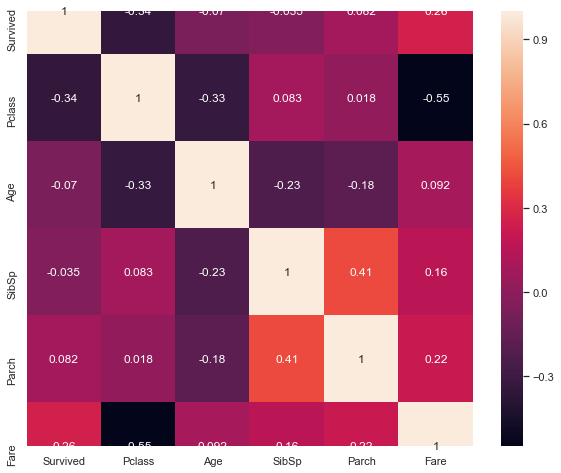

In [225]:
#visualizing the correlation on a heatmap
plt.figure(figsize=(10,8))
sb.heatmap(corr, annot = True)
plt.show()

In [ ]:
The correlations are low which means most of the features are independent
There is low multi-collinearity

## Feature Engineering

#### Size of the Family onboard

In [226]:
df_train6 = df_train5
df_train6['family_size'] = df_train6.SibSp + df_train6.Parch+1

In [227]:
def family(size):
    a = ''
    if (size <= 1):
        a = 'alone'
    elif (size <= 4):
        a = 'wee'
    else:
        a = 'big'
    return a

In [229]:
df_train7 = df_train6
df_train7['family'] = df_train7['family_size'].map(family)
df_train7

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size,family
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,Z,S,2,wee
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,C,2,wee
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,Z,S,1,alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C,S,2,wee
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,Z,S,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,Z,S,1,alone
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,B,S,1,alone
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,Z,S,4,wee
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,C,1,alone


#### Fare Groups

In [57]:
#The fare column gives the total fare paid therefore we need to divide the fare by the family size 
#to obtain the fare paid per person

In [230]:
## Calculating fare based on family size. 
#creating a copy
df_train8 = df_train7
df_train8['calculated_fare'] = df_train8.Fare/df_train8.family_size

In [231]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

df_train8['fare_group'] = df_train8['calculated_fare'].map(fare_group)
df_train8
#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size,family,calculated_fare,fare_group
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,Z,S,2,wee,3.62500,Very_low
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,C,2,wee,35.64165,high
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,Z,S,1,alone,7.92500,low
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C,S,2,wee,26.55000,high
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,Z,S,1,alone,8.05000,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,Z,S,1,alone,13.00000,mid
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,B,S,1,alone,30.00000,high
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,Z,S,4,wee,5.86250,low
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,C,1,alone,30.00000,high


#### Name

In [232]:
# Creating a new colomn with a 
#creating a copy
df_train9 =  df_train8
df_train9['name_length'] = [len(i) for i in df_train9.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'long'
    else:
        a = 'X_long'
    return a


df_train9['nLength_group'] = df_train9['name_length'].map(name_length_group)
df_train9.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size,family,calculated_fare,fare_group,name_length,nLength_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Z,S,2,wee,3.62500,Very_low,23,medium
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,2,wee,35.64165,high,51,X_long
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Z,S,1,alone,7.92500,low,22,medium
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,2,wee,26.55000,high,44,long


In [233]:
train = pd.get_dummies(df_train9, columns=["Pclass", 'Sex','Cabin','Embarked','nLength_group', 'family', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)

In [234]:
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

X = train.drop('Survived', axis=1)
y = train['Survived']

train_features = X

model = PCA(n_components=5).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = [ 'Age', 'SibSp', 'Parch', 'calculated_fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_N',
       'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'nLength_group_X_long', 'nLength_group_long', 'nLength_group_medium',
       'nLength_group_short', 'family_alone', 'family_big', 'family_wee',
       'fare_group_Very_low', 'fare_group_high', 'fare_group_low',
       'fare_group_mid', 'fare_group_very_high']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,calculated_fare
1,PC1,Age
2,PC2,SibSp
3,PC3,Pclass_3
4,PC4,Parch


In [235]:
model.explained_variance_ratio_

array([8.83199985e-01, 1.13295000e-01, 1.04727768e-03, 4.72848757e-04,
       3.66893778e-04])

In [236]:
X

,Age,SibSp,Parch,calculated_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,...,nLength_group_medium,nLength_group_short,family_alone,family_big,family_wee,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,22.000000,1,0,3.62500,0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,0
1,38.000000,1,0,35.64165,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,26.000000,0,0,7.92500,0,0,1,1,0,0,...,1,0,1,0,0,0,0,1,0,0
3,35.000000,1,0,26.55000,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,35.000000,0,0,8.05000,0,0,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.00000,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
887,19.000000,0,0,30.00000,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
888,29.699118,1,2,5.86250,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
889,26.000000,0,0,30.00000,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0


##  Modelling

### Baseline Model: Logistic Regression


In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [247]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear')

## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

print ("The accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),5)))

The accuracy Score is: 0.8324


In [248]:
print(confusion_matrix(y_test, y_pred))

[[94 12]
 [18 55]]


In [ ]:
The baseline model has an accuracy of 83%

Confusion Matrix Summary
True positive  : 94
True Negative  : 55
False Positive : 12
False Negative : 18

### KNN: K-Nearest Neighbor

#### Approach 1: 80 - 20 split

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [250]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [251]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [252]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [253]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       113
           1       0.78      0.58      0.66        66

    accuracy                           0.78       179
   macro avg       0.78      0.74      0.75       179
weighted avg       0.78      0.78      0.77       179



In [254]:
accuracy_score(y_test, y_pred)

0.7821229050279329

In [255]:
print(confusion_matrix(y_test, y_pred))

[[102  11]
 [ 28  38]]


In [ ]:
The KNN model has an accuracy of 78%

Confusion Matrix Summary
True positive  : 102
True Negative  : 38
False Positive : 11
False Negative : 28

#### Approach 2: 70 - 30 split

In [290]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [291]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [292]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [293]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [294]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       163
           1       0.77      0.70      0.74       105

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



In [295]:
accuracy_score(y_test, y_pred)

0.8022388059701493

In [296]:
print(confusion_matrix(y_test, y_pred))

[[141  22]
 [ 31  74]]


In [ ]:
The KNN model has an accuracy of 80 %

Confusion Matrix Summary
True positive  : 141
True Negative  : 74
False Positive : 22
False Negative : 31

#### Approach 3: 60 - 40 split

In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [298]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [299]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [300]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [301]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       220
           1       0.74      0.65      0.69       137

    accuracy                           0.78       357
   macro avg       0.77      0.75      0.76       357
weighted avg       0.77      0.78      0.77       357



In [302]:
accuracy_score(y_test, y_pred)

0.7759103641456583

In [303]:
print(confusion_matrix(y_test, y_pred))

[[188  32]
 [ 48  89]]


In [ ]:
The KNN model has an accuracy of 77%

Confusion Matrix Summary
True positive  : 188
True Negative  : 89
False Positive : 32
False Negative : 48

### Naive Bayes

In [256]:
 # Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [257]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [258]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7798507462686567


In [ ]:
The Naive Bayes model has an accuracy of 77.9%


## Challenging the solution: Dimensionality Reduction

### Approach 1:5 Principal Components

KNN and Naive Bayes Models using 5 Principal Components.

In [259]:
df

,0,1
0,PC0,calculated_fare
1,PC1,Age
2,PC2,SibSp
3,PC3,Pclass_3
4,PC4,Parch


In [260]:
# Reviewing the Solution 
#Modelling using the first 10 principal components
X1 = X[['Age', 'SibSp', 'Parch', 'calculated_fare','Pclass_3']]
X1.head(5)

,Age,SibSp,Parch,calculated_fare,Pclass_3
0,22.0,1,0,3.62500,1
1,38.0,1,0,35.64165,0
2,26.0,0,0,7.92500,1
3,35.0,1,0,26.55000,0
4,35.0,0,0,8.05000,1


#### KNN

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20)

In [262]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [263]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [264]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [265]:
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       117
           1       0.57      0.63      0.60        62

    accuracy                           0.71       179
   macro avg       0.68      0.69      0.69       179
weighted avg       0.72      0.71      0.71       179



In [266]:
accuracy_score(y_test, y_pred)

0.7094972067039106

In [267]:
print(confusion_matrix(y_test, y_pred))

[[88 29]
 [23 39]]


In [ ]:
The KNN model has an accuracy of 70%

Confusion Matrix Summary
True positive  : 88
True Negative  : 39
False Positive : 29
False Negative : 23

#### Naive Bayes

In [268]:
 # Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=6)

In [269]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [270]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7201492537313433


In [ ]:
The Naive Bayes model has an accuracy of 72%

### Approach 2: LDA

In [271]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(X, y, test_size=0.2, random_state=0)
A_train, A_test, b_train, b_test

(           Age  SibSp  Parch  calculated_fare  Pclass_1  Pclass_2  Pclass_3  \
 140  29.699118      0      2         5.081933         0         0         1   
 439  31.000000      0      0        10.500000         0         1         0   
 817  31.000000      1      1        12.334733         0         1         0   
 378  20.000000      0      0         4.012500         0         0         1   
 491  21.000000      0      0         7.250000         0         0         1   
 ..         ...    ...    ...              ...       ...       ...       ...   
 835  39.000000      1      1        27.719433         1         0         0   
 192  19.000000      1      0         3.927100         0         0         1   
 629  29.699118      0      0         7.733300         0         0         1   
 559  36.000000      1      0         8.700000         0         0         1   
 684  60.000000      1      1        13.000000         0         1         0   
 
      Sex_female  Sex_male  Cabin_A  .

In [272]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [286]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
A_train = lda.fit_transform(A_train, b_train)
A_test = lda.transform(A_test)

In [287]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(A_train, b_train)
b_pred = classifier.predict(A_test)

In [288]:
#Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(b_test, b_pred))

print('Accuracy' + str (accuracy_score(b_test, b_pred)))

[[97 13]
 [19 50]]
Accuracy0.8212290502793296


In [ ]:
After LDA, the model has an accuracy of 82 %

Confusion Matrix Summary
True positive  : 97
True Negative  : 50
False Positive : 13
False Negative : 19

In [ ]:
Modelling Summary

Model                : Accuracy Score
    
Logistrc Regression : 83.24 %
KNN                 : 80 % #using the 70- 30 split
Naive Bayes         : 72%
After PCA           : 70.9 %
LDA                 : 82%

In [ ]:
#The best predictor is the Baseline Model : Logistric Regressor followed by The LDA model.

## Follow up questions

At this point, we can refine our question or collect new data, all in an iterative process to get to the truth.

### a). Did we have the right data?

In [ ]:
Yes! the data was sufficient and the features were useful in modelling.
The models above achieved almost the same accuracy levels which means that the data is good for training.

### b). Do we need other data to answer our question?

In [ ]:
More Feature Engineering may be done to uncover more patterns in the data 
that may improve the model accuracy.

### c). Did we have the right question?

In [ ]:
yes! Predicting survival based on past disasters helps us understand panic psychology and what to 
anticipate incase disaster strikes in future.